In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For Dataset : download it from the below Link 
"https://drive.google.com/file/d/151vG5YcecNJ2umbifHbGxXcItKbWHCB7/view?usp=share_link"

In [200]:
df=pd.read_csv("Iris_dt.csv")

In [201]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [202]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [203]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),"\n",sep="\n")

sepal_length
[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]


sepal_width
[2.  2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8
 3.9 4.  4.1 4.2 4.4]


petal_length
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]


petal_width
[0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]


species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']




In [204]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [205]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [206]:
df.duplicated().sum()

3

In [207]:
df.drop_duplicates(inplace=True)

In [208]:
# Outlier Analyses

In [209]:
num=[]
for i in df.columns:
    if df[i].dtypes =="float64":
        num.append(i)

In [210]:
num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

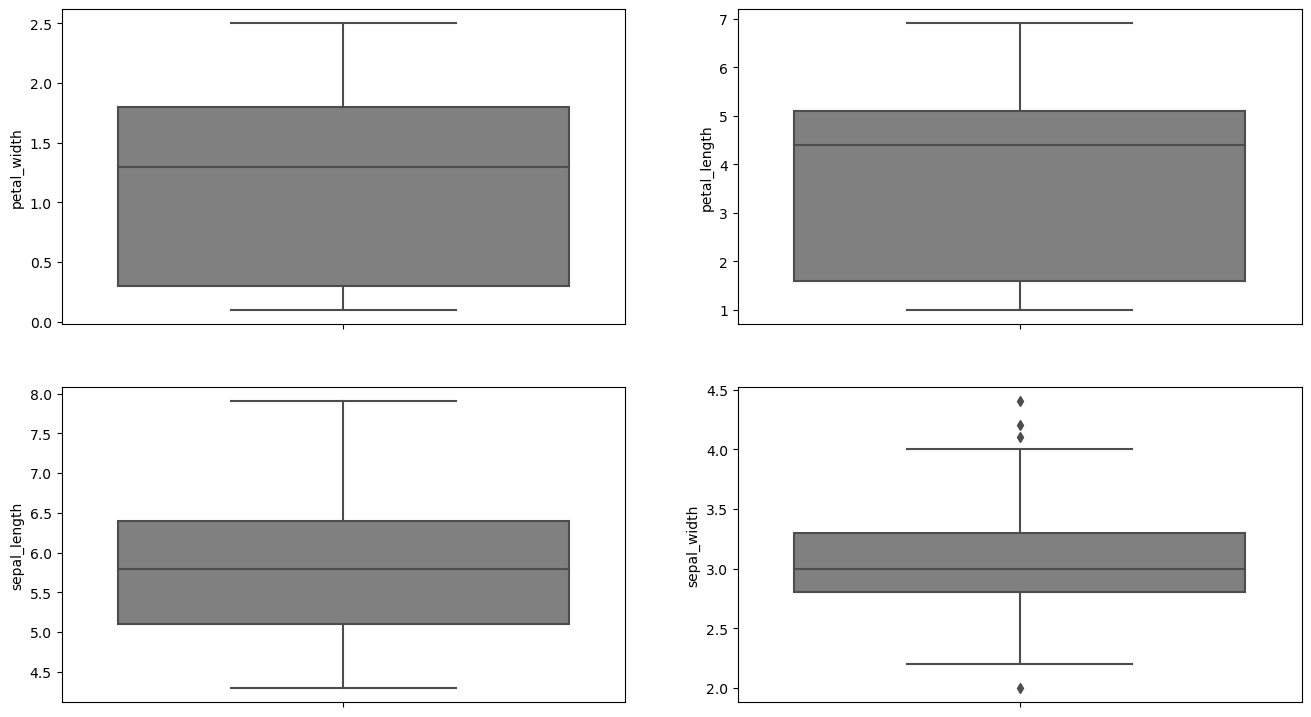

In [211]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
x=["petal_width","petal_length","sepal_length","sepal_width"]
sns.boxplot(y = 'petal_width', data=df, orient='v' , ax=axes[0, 0],color="gray")
sns.boxplot(y = 'petal_length', data=df, orient='v' , ax=axes[0, 1],color="gray")
sns.boxplot(y = 'sepal_length', data=df, orient='v' , ax=axes[1, 0],color="gray")
sns.boxplot(y = 'sepal_width', data=df, orient='v' , ax=axes[1, 1],color="gray")
plt.show()

#Sepal width has some outlier deal with it appropriately


In [212]:
len(df)

147

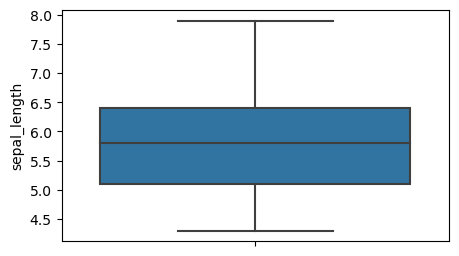

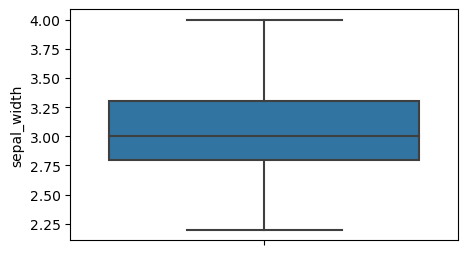

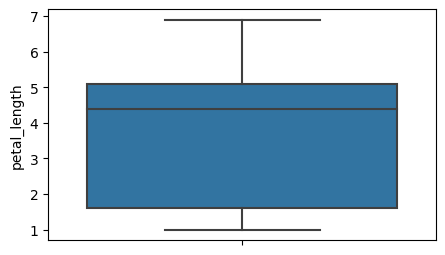

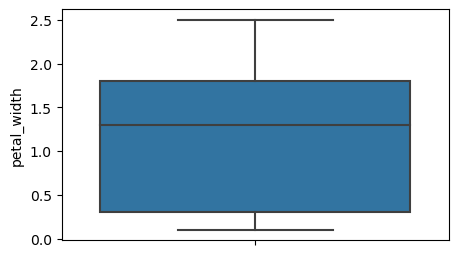

In [213]:
# outlier Removal 
for i in num:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr= q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    df = df[(df[i]>=ll) & (df[i]<= ul)]
    plt.figure(figsize=(5,3))
    sns.boxplot(y = i, data =df)   

In [214]:
len(df)

143

In [215]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [216]:
df["species"].value_counts()

Iris-versicolor    49
Iris-virginica     49
Iris-setosa        45
Name: species, dtype: int64

<Axes: title={'center': 'Species Count'}, xlabel='species', ylabel='Count'>

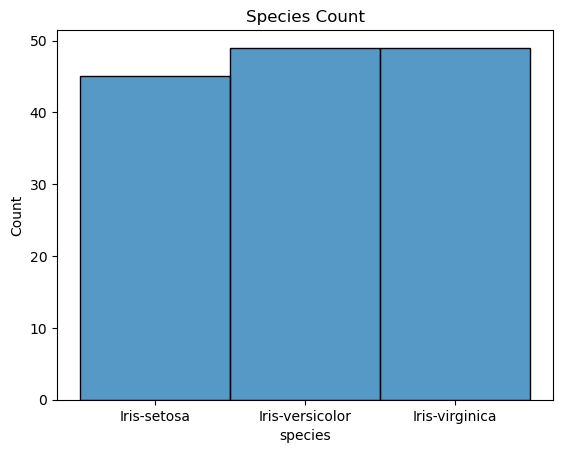

In [217]:
# Distribution of Label 
plt.title('Species Count')
sns.histplot(df['species'])

C:\Users\piyus.LAPTOP-7O04196B\AppData\Local\Temp\ipykernel_14208\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


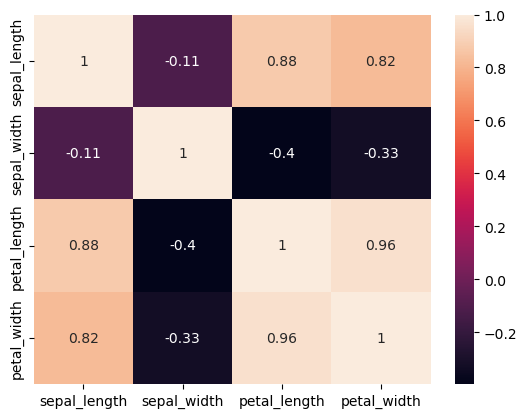

In [218]:
sns.heatmap(df.corr(),annot=True)
plt.show()
#Sepal Length and Sepal Width features are slightly correlated with each other
#Feature must be independent for making good model


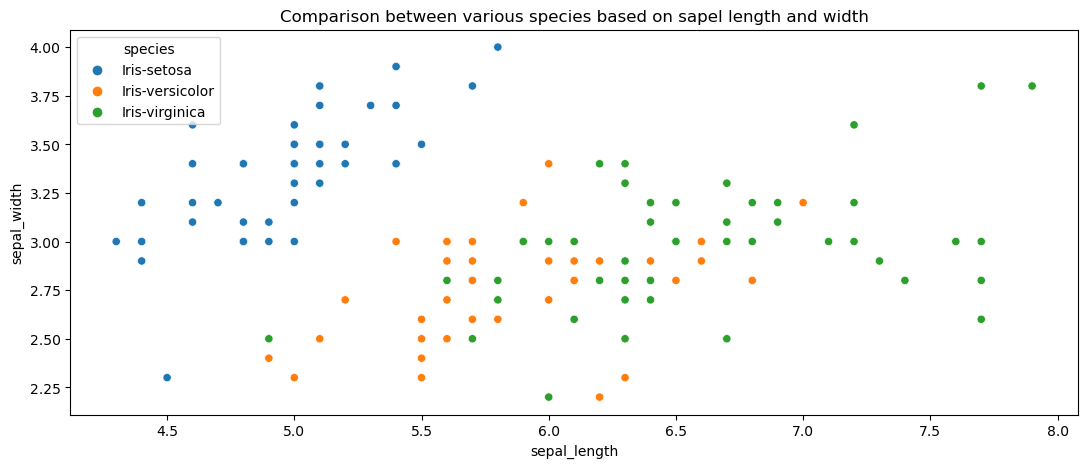

In [219]:
plt.figure(figsize=(13,5))
plt.title('Comparison between various species based on sapel length and width')
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue =df['species'])
plt.show()

#Insight 
#Iris Setosa species has smaller sepal length but higher width. 
#Versicolor lies in almost middle for length as well as width 
#Virginica has larger sepal lengths and smaller sepal widths

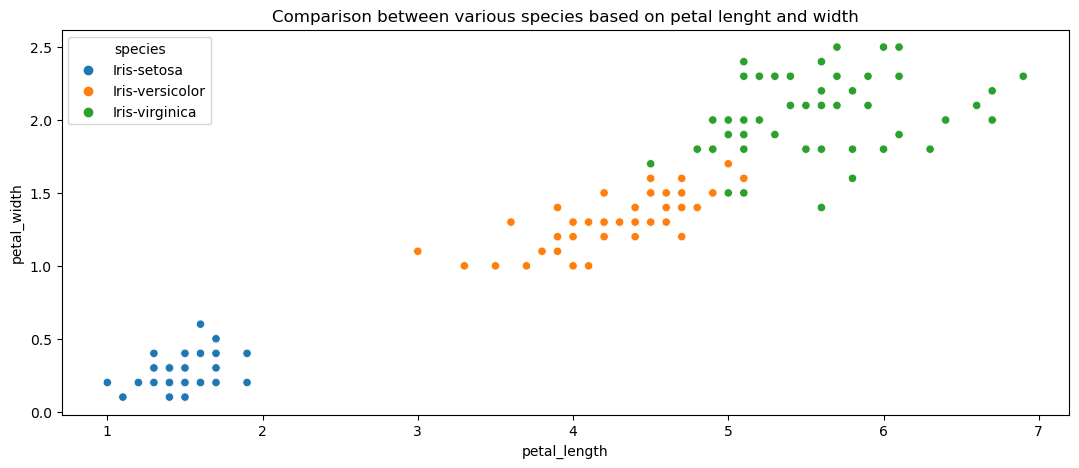

In [220]:
plt.figure(figsize=(13,5))
plt.title('Comparison between various species based on petal lenght and width')
sns.scatterplot(x=df['petal_length'],y=df['petal_width'],hue =df['species'])
plt.show()
#Setosa species have the smallest petal length as well as petal width
#Versicolor species have average petal length and petal width 
#Virginica species have the highest petal length as well as petal width

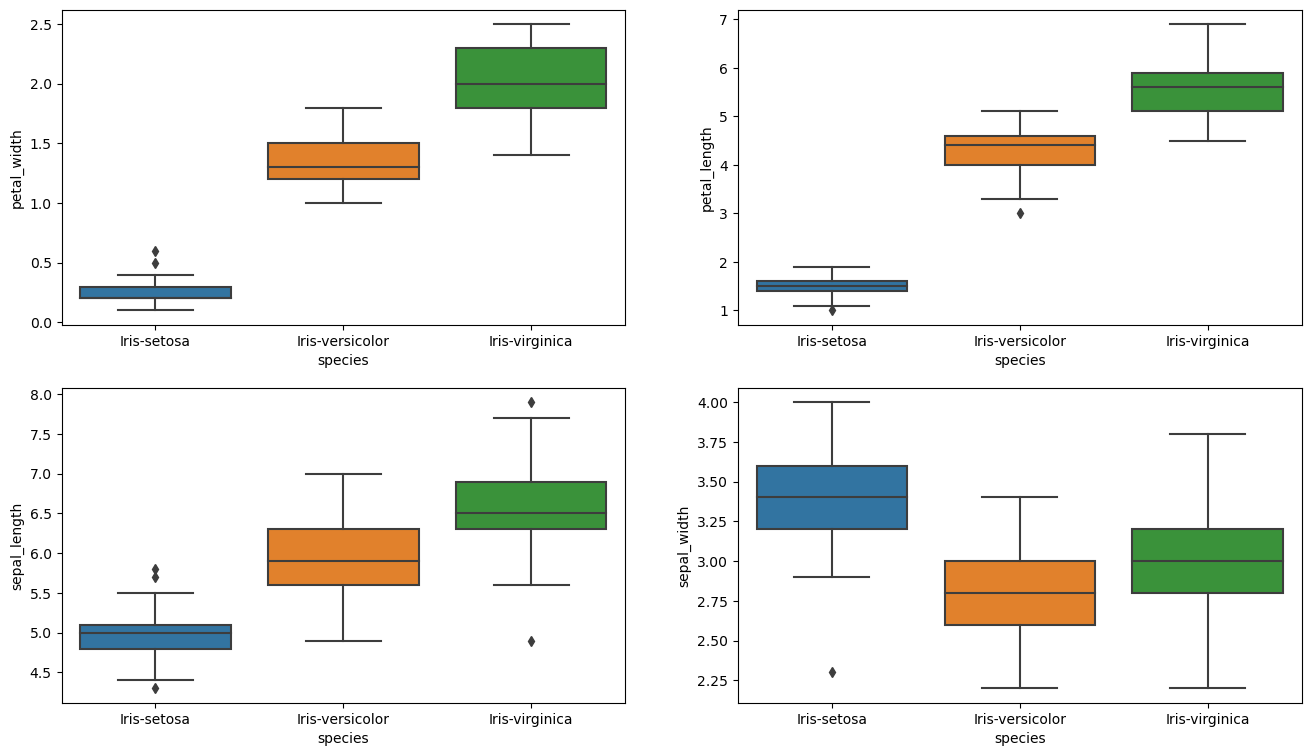

In [221]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='petal_width', x= 'species', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='petal_length', x= 'species', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='sepal_length', x= 'species', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='sepal_width', x= 'species', data=df, orient='v' , ax=axes[1, 1])
plt.show()

#Insight
#Setosa is having smaller feature and less distributed
#Versicolor is distributed in a average manner and average features
#Virginica is highly distributed with large no .of values and features
#Clearly the mean/ median values are being shown by each plots for various features(sepal length & width, petal length & width)

<Figure size 500x500 with 0 Axes>

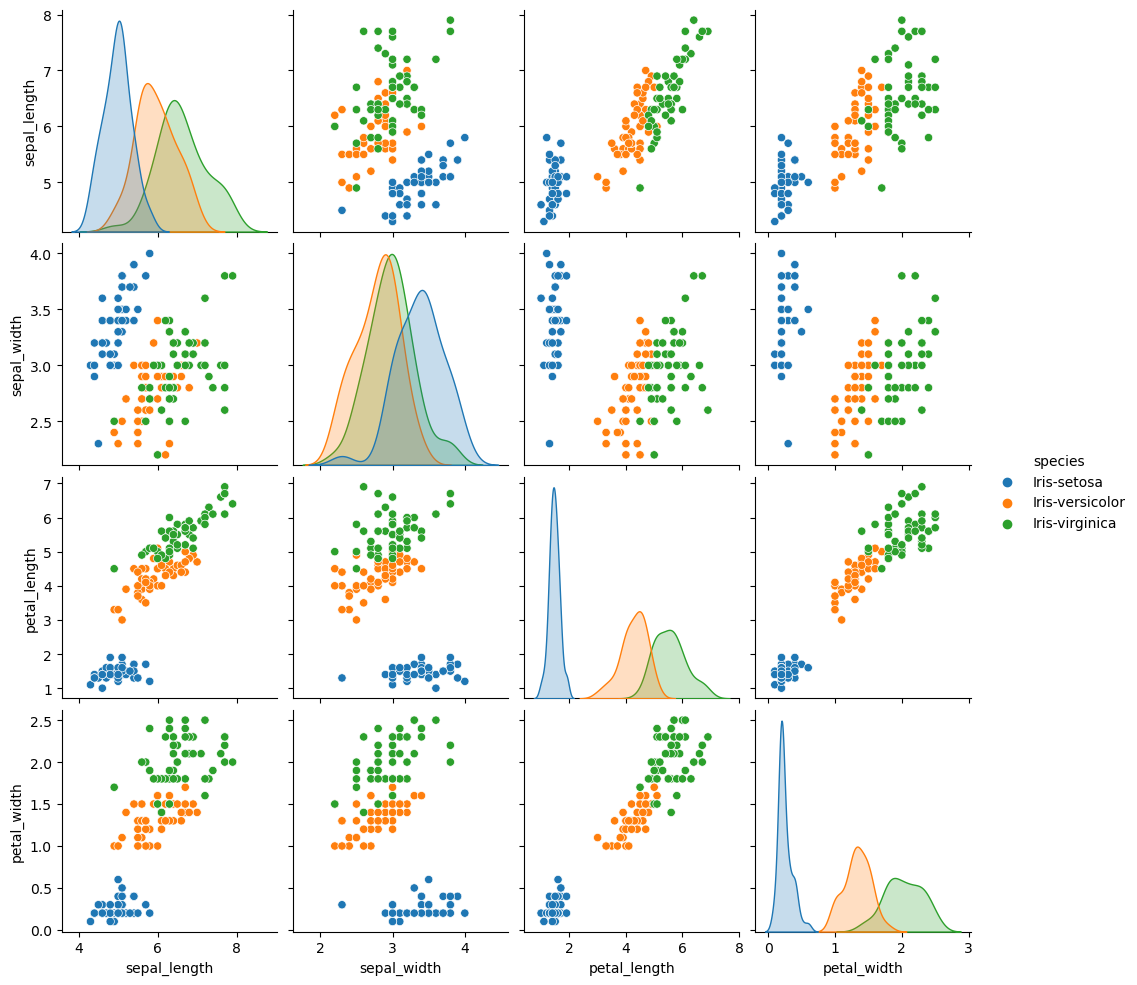

In [222]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df,diag_kind='kde',hue="species")
plt.show()

C:\Users\piyus.LAPTOP-7O04196B\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\piyus.LAPTOP-7O04196B\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs

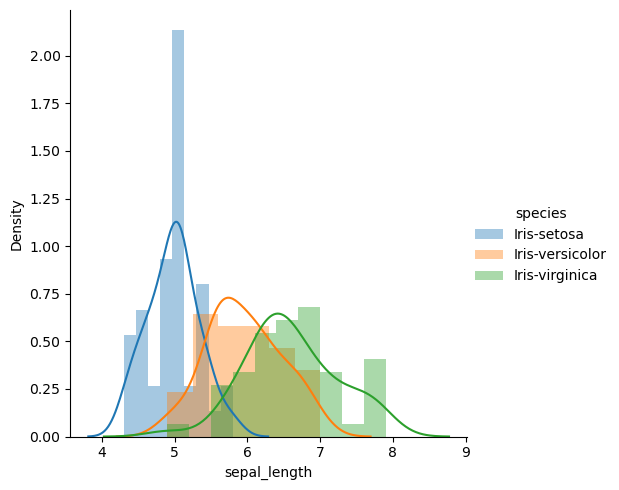

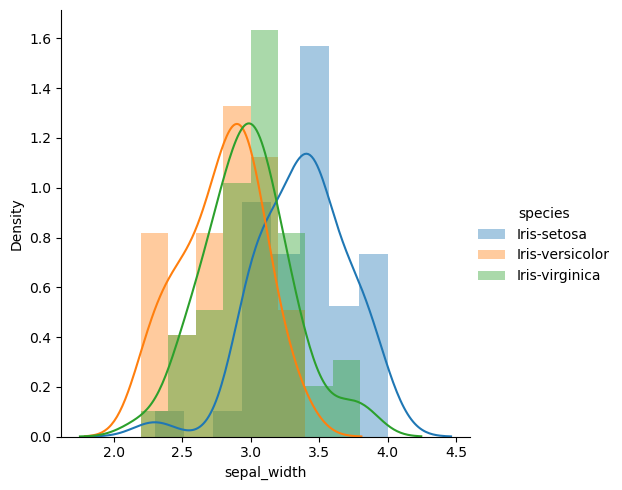

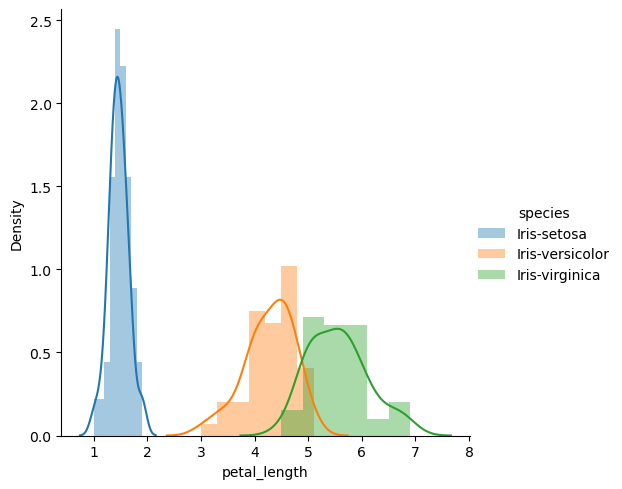

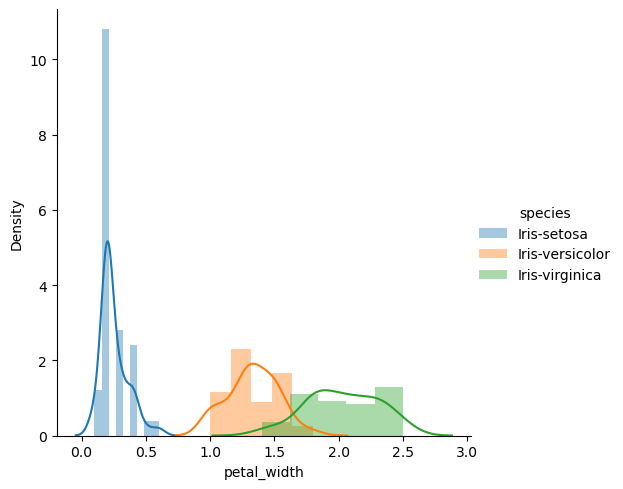

In [223]:
sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "sepal_length").add_legend()
sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "sepal_width").add_legend()
sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(df, hue="species", height=5).map(sns.distplot, "petal_width").add_legend()

Plot 1 shows that there is a significant amount of overlap between the species on sepal length, so it is not an effective Classification feature 

Plot 2 shows that there is even higher overlap between the species on sepal width, so it is not an effective Classification feature 

Plot 3 shows that petal length is a good Classification feature as it clearly separates the species . The overlap is extremely less (between Versicolor and Virginica) , Setosa is well separated from the rest two Just like Plot 3, 

Plot 4 also shows that petal width is a good Classification feature . The overlap is significantly less (between Versicolor and Virginica) , Setosa is well separated from the rest two

Choosing Plot 3 (Classification feature as Petal Length) to distinguish among the species

Conclusion : Petal_Length > Petal_width >> Sepal_Length >> Sepal_Width
if we want to classify based on the no of parameter then this is the priority

In [224]:
#Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[num]= sc.fit_transform(df[num])

In [225]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.926103,1.163072,-1.393237,-1.370894,Iris-setosa
1,-1.166453,-0.096923,-1.393237,-1.370894,Iris-setosa
2,-1.406803,0.407075,-1.450554,-1.370894,Iris-setosa
3,-1.526978,0.155076,-1.335921,-1.370894,Iris-setosa
4,-1.046278,1.415071,-1.393237,-1.370894,Iris-setosa


In [226]:
# Label Encoding
df["species"]=df["species"].replace({"Iris-versicolor":1,"Iris-virginica":2,"Iris-setosa":3})

In [227]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.926103,1.163072,-1.393237,-1.370894,3
1,-1.166453,-0.096923,-1.393237,-1.370894,3
2,-1.406803,0.407075,-1.450554,-1.370894,3
3,-1.526978,0.155076,-1.335921,-1.370894,3
4,-1.046278,1.415071,-1.393237,-1.370894,3


# Pca Analyses

In [228]:
from sklearn.decomposition import PCA

In [229]:
pca=PCA(n_components=4)
pca.fit_transform(df[num])
print(pca.explained_variance_)
print()
print(pca.components_)
print()
print(pca.explained_variance_ratio_)

[2.9222523  0.93007831 0.15416135 0.02167705]

[[ 0.52818136 -0.25034174  0.58195826  0.56540079]
 [ 0.34076734  0.93702141  0.02272523  0.07315781]
 [-0.7304602   0.2127877   0.13853242  0.63400162]
 [-0.26707671  0.11849594  0.80100993 -0.52250534]]

[0.72545424 0.23089357 0.03827083 0.00538137]


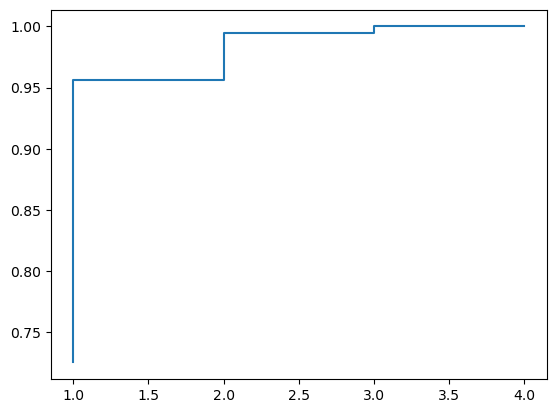

In [230]:
plt.step(list(range(1,5)),np.cumsum(pca.explained_variance_ratio_),where="pre")

In [231]:
pca3=PCA(n_components=3)
pca3.fit(df[num])
x=pca3.transform(df[num])
sum(pca3.explained_variance_ratio_)

0.9946186342908822

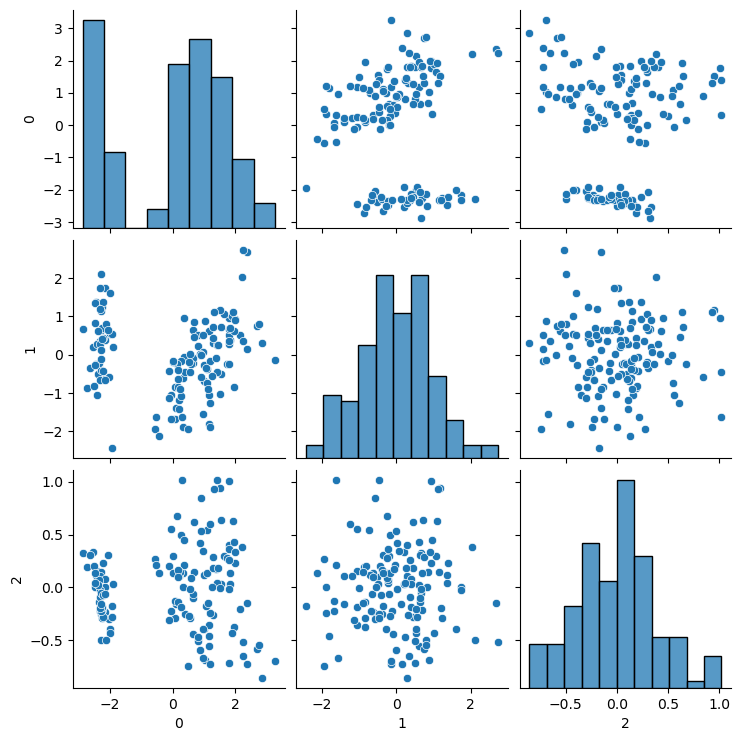

In [232]:
sns.pairplot(pd.DataFrame(x))